In [87]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
pd.set_option('display.max_rows', None)


In [88]:
EDA = pd.read_csv('dh_etas.csv')

In [89]:
EDA.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_couriers,total_busy_couriers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-01-21 17:02:39,2015-01-21 18:01:30,5919,american,1.0,3,950,3,350,900,3.0,2.0,1.0,446,628.0
1,1.0,2015-02-12 23:47:42,2015-02-13 00:13:52,3954,vietnamese,3.0,2,1800,2,600,650,4.0,3.0,2.0,446,167.0
2,1.0,2015-02-12 23:52:34,2015-02-13 00:23:19,5654,sandwich,5.0,1,1295,1,1295,1295,6.0,2.0,1.0,251,586.0
3,1.0,2015-02-12 23:52:36,2015-02-13 00:38:47,5560,japanese,3.0,1,2802,1,2387,2398,12.0,16.0,27.0,251,1058.0
4,1.0,2015-02-12 23:35:28,2015-02-13 00:29:22,2406,cafe,4.0,6,7160,4,795,1590,10.0,10.0,10.0,446,536.0


In [90]:
EDA.shape

(153950, 16)

In [91]:
EDA_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153950 entries, 0 to 153949
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     153190 non-null  float64
 1   created_at                                    153950 non-null  object 
 2   actual_delivery_time                          153946 non-null  object 
 3   store_id                                      153950 non-null  int64  
 4   store_primary_category                        150223 non-null  object 
 5   order_protocol                                153178 non-null  float64
 6   total_items                                   153950 non-null  int64  
 7   subtotal                                      153950 non-null  int64  
 8   num_distinct_items                            153950 non-null  int64  
 9   min_item_price                                15

In [92]:
EDA_EDA.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_couriers,total_busy_couriers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,153190.000000,153950.000000,153178.0000,153950.000000,153950.000000,153950.000000,153950.000000,153950.000000,141817.000000,141817.000000,141817.000000,153950.000000,153432.000000
mean,2.959645,3529.521423,2.8798,3.190906,2671.381877,2.664794,684.791075,1155.096564,43.842106,41.386921,56.255900,308.441007,543.761908
std,1.515317,2053.427825,1.5038,2.699513,1820.377007,1.626465,520.719298,557.205295,33.879035,31.985509,51.096157,90.295716,218.140842
min,1.000000,1.000000,1.0000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.0000,2.000000,1400.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3575.000000,3.0000,3.000000,2199.000000,2.000000,595.000000,1092.000000,36.000000,34.000000,39.000000,251.000000,543.000000
75%,4.000000,5292.000000,4.0000,4.000000,3385.000000,3.000000,945.000000,1395.000000,64.000000,62.000000,82.000000,446.000000,700.000000
max,6.000000,6987.000000,7.0000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,276.000000,2715.000000,2088.000000


In [93]:
EDA.duplicated().sum()

0

In [94]:
EDA.isnull().sum()

market_id                                         760
created_at                                          0
actual_delivery_time                                4
store_id                                            0
store_primary_category                           3727
order_protocol                                    772
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_couriers                          12133
total_busy_couriers                             12133
total_outstanding_orders                        12133
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      518
dtype: int64

In [95]:
missing_percentage = (EDA.isnull().sum() / len(EDA)) * 100
missing_percentage

market_id                                       0.493667
created_at                                      0.000000
actual_delivery_time                            0.002598
store_id                                        0.000000
store_primary_category                          2.420916
order_protocol                                  0.501462
total_items                                     0.000000
subtotal                                        0.000000
num_distinct_items                              0.000000
min_item_price                                  0.000000
max_item_price                                  0.000000
total_onshift_couriers                          7.881130
total_busy_couriers                             7.881130
total_outstanding_orders                        7.881130
estimated_order_place_duration                  0.000000
estimated_store_to_consumer_driving_duration    0.336473
dtype: float64

In [96]:
EDA['created_at'] = pd.to_datetime(EDA['created_at'], utc=True)
EDA['actual_delivery_time'] = pd.to_datetime(EDA['actual_delivery_time'], utc=True)

EDA['actual_time_in_seconds'] = (EDA['actual_delivery_time'] - EDA['created_at']).dt.total_seconds()

In [97]:
EDA.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_couriers,total_busy_couriers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_in_seconds
0,1.0,2015-01-21 17:02:39+00:00,2015-01-21 18:01:30+00:00,5919,american,1.0,3,950,3,350,900,3.0,2.0,1.0,446,628.0,3531.0
1,1.0,2015-02-12 23:47:42+00:00,2015-02-13 00:13:52+00:00,3954,vietnamese,3.0,2,1800,2,600,650,4.0,3.0,2.0,446,167.0,1570.0
2,1.0,2015-02-12 23:52:34+00:00,2015-02-13 00:23:19+00:00,5654,sandwich,5.0,1,1295,1,1295,1295,6.0,2.0,1.0,251,586.0,1845.0
3,1.0,2015-02-12 23:52:36+00:00,2015-02-13 00:38:47+00:00,5560,japanese,3.0,1,2802,1,2387,2398,12.0,16.0,27.0,251,1058.0,2771.0
4,1.0,2015-02-12 23:35:28+00:00,2015-02-13 00:29:22+00:00,2406,cafe,4.0,6,7160,4,795,1590,10.0,10.0,10.0,446,536.0,3234.0


In [98]:
numeric_columns = EDA.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['market_id', 'store_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_couriers', 'total_busy_couriers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'actual_time_in_seconds'],
      dtype='object')

In [99]:
correlations = EDA[numeric_columns].corrwith(EDA['actual_time_in_seconds'])

# Combine the results into a summary
analysis_summary = pd.DataFrame({
    'Missing Percentage': missing_percentage,
    'Correlation with Target': correlations
}).sort_values(by='Missing Percentage', ascending=False)

analysis_summary


,Missing Percentage,Correlation with Target
total_busy_couriers,7.881130,0.056413
total_onshift_couriers,7.881130,0.042205
total_outstanding_orders,7.881130,0.126315
store_primary_category,2.420916,NaN
order_protocol,0.501462,-0.049125
market_id,0.493667,-0.028059
estimated_store_to_consumer_driving_duration,0.336473,0.176959
actual_delivery_time,0.002598,NaN
created_at,0.000000,NaN
estimated_order_place_duration,0.000000,0.072233


In [100]:
EDA.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_couriers,total_busy_couriers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_in_seconds
0,1.0,2015-01-21 17:02:39+00:00,2015-01-21 18:01:30+00:00,5919,american,1.0,3,950,3,350,900,3.0,2.0,1.0,446,628.0,3531.0
1,1.0,2015-02-12 23:47:42+00:00,2015-02-13 00:13:52+00:00,3954,vietnamese,3.0,2,1800,2,600,650,4.0,3.0,2.0,446,167.0,1570.0
2,1.0,2015-02-12 23:52:34+00:00,2015-02-13 00:23:19+00:00,5654,sandwich,5.0,1,1295,1,1295,1295,6.0,2.0,1.0,251,586.0,1845.0
3,1.0,2015-02-12 23:52:36+00:00,2015-02-13 00:38:47+00:00,5560,japanese,3.0,1,2802,1,2387,2398,12.0,16.0,27.0,251,1058.0,2771.0
4,1.0,2015-02-12 23:35:28+00:00,2015-02-13 00:29:22+00:00,2406,cafe,4.0,6,7160,4,795,1590,10.0,10.0,10.0,446,536.0,3234.0
5,1.0,2015-02-12 23:36:04+00:00,2015-02-13 00:20:21+00:00,865,burger,1.0,3,1427,3,239,769,15.0,10.0,10.0,446,455.0,2657.0
6,1.0,2015-02-12 23:37:04+00:00,2015-02-13 00:46:51+00:00,624,american,5.0,2,1430,2,695,735,15.0,10.0,10.0,251,827.0,4187.0
7,1.0,2015-02-01 16:32:41+00:00,2015-02-01 17:39:08+00:00,5342,american,1.0,3,4300,3,1200,1500,5.0,6.0,11.0,446,235.0,3987.0
8,1.0,2015-02-08 02:28:56+00:00,2015-02-08 03:07:56+00:00,2438,pizza,3.0,2,1376,1,559,559,44.0,47.0,68.0,251,414.0,2340.0
9,1.0,2015-02-08 02:28:58+00:00,2015-02-08 03:28:27+00:00,4361,pizza,3.0,3,2490,3,230,935,24.0,24.0,31.0,251,794.0,3569.0


In [101]:
EDA.nunique()

market_id                                            6
created_at                                      141491
actual_delivery_time                            139210
store_id                                          6541
store_primary_category                              74
order_protocol                                       7
total_items                                         54
subtotal                                          7881
num_distinct_items                                  20
min_item_price                                    2188
max_item_price                                    2493
total_onshift_couriers                             172
total_busy_couriers                                159
total_outstanding_orders                           269
estimated_order_place_duration                      88
estimated_store_to_consumer_driving_duration      1309
actual_time_in_seconds                            6805
dtype: int64

# EDA


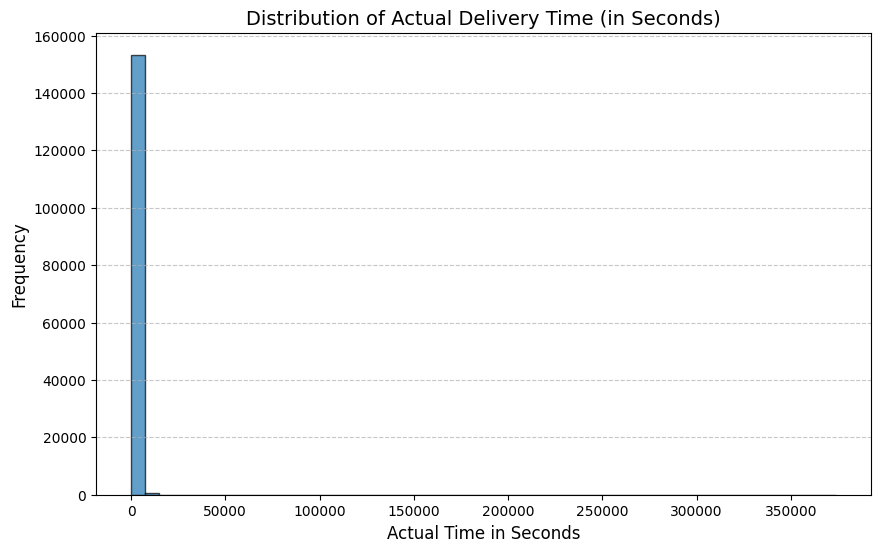

In [102]:
plt.figure(figsize=(10, 6))
EDA['actual_time_in_seconds'].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Actual Delivery Time (in Seconds)', fontsize=14)
plt.xlabel('Actual Time in Seconds', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [103]:
numeric_columns = EDA.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['market_id', 'store_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_couriers', 'total_busy_couriers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'actual_time_in_seconds'],
      dtype='object')

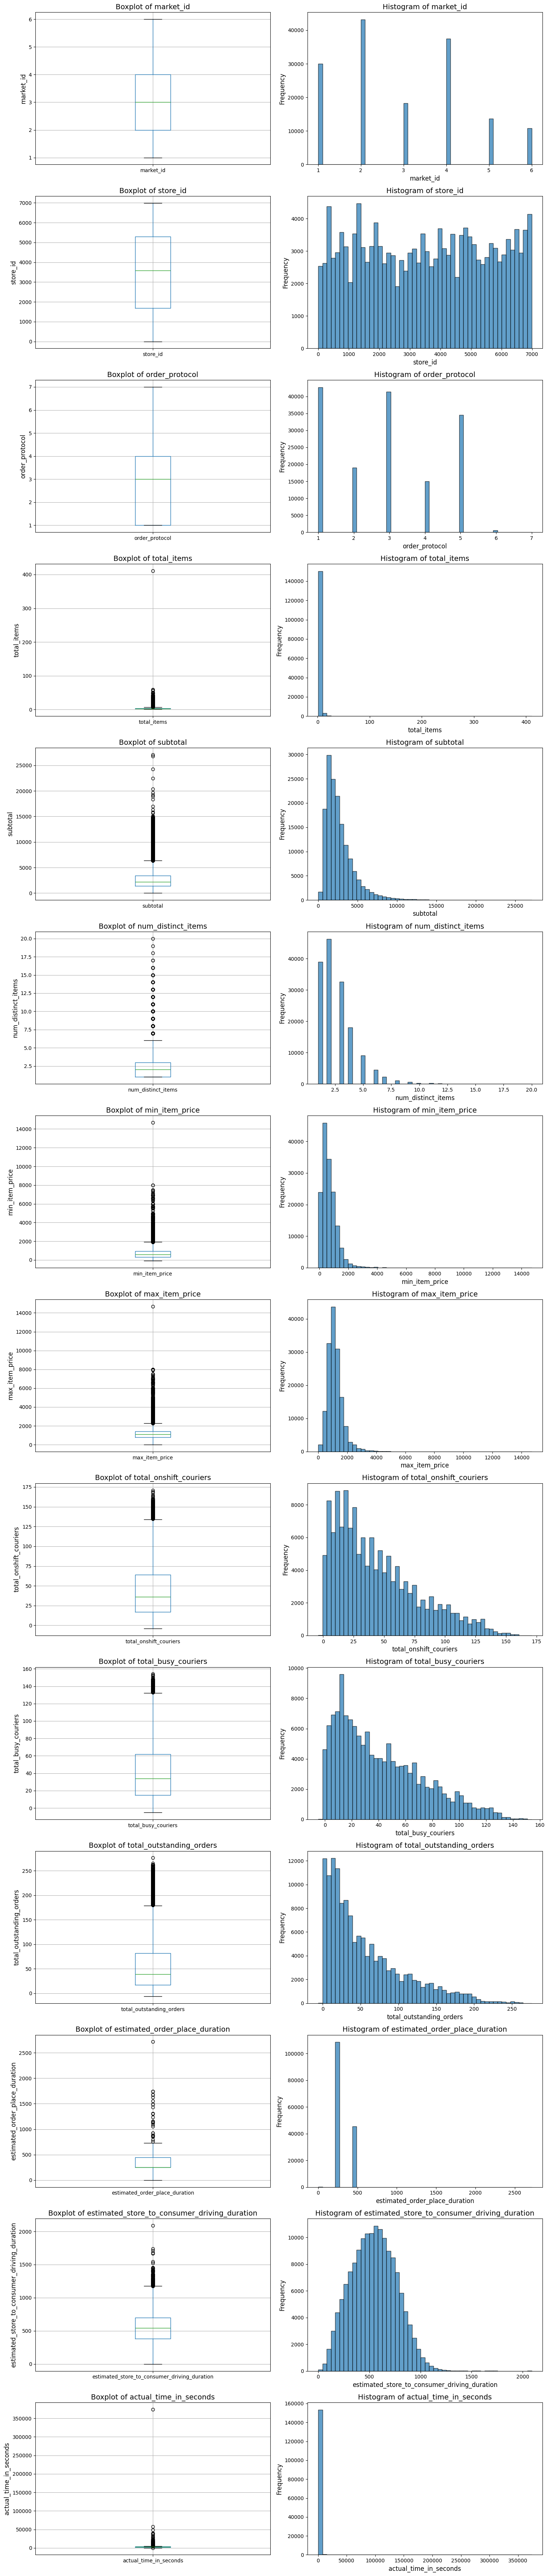

In [104]:
# Plot boxplots and histograms side by side for the selected numeric features
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(15, 5 * len(numeric_columns)))

for i, feature in enumerate(numeric_columns):
    # Boxplot
    EDA.boxplot(column=feature, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {feature}', fontsize=14)
    axes[i, 0].set_ylabel(feature, fontsize=12)
    
    # Histogram
    EDA[feature].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram of {feature}', fontsize=14)
    axes[i, 1].set_xlabel(feature, fontsize=12)
    axes[i, 1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [105]:
analysis_summary


,Missing Percentage,Correlation with Target
total_busy_couriers,7.881130,0.056413
total_onshift_couriers,7.881130,0.042205
total_outstanding_orders,7.881130,0.126315
store_primary_category,2.420916,NaN
order_protocol,0.501462,-0.049125
market_id,0.493667,-0.028059
estimated_store_to_consumer_driving_duration,0.336473,0.176959
actual_delivery_time,0.002598,NaN
created_at,0.000000,NaN
estimated_order_place_duration,0.000000,0.072233


In [106]:
EDA['hour_of_day'] = EDA['created_at'].dt.hour
EDA['day_of_week'] = EDA['created_at'].dt.day_name()

In [107]:
EDA.sample(10)


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_couriers,total_busy_couriers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_in_seconds,hour_of_day,day_of_week
37565,2.0,2015-01-27 02:15:09+00:00,2015-01-27 03:14:43+00:00,2179,mediterranean,2.0,2,1690,1,845,845,79.0,100.0,107.0,251,545.0,3574.0,2,Tuesday
68206,2.0,2015-01-22 01:50:25+00:00,2015-01-22 02:29:46+00:00,6821,sandwich,5.0,4,3222,2,799,825,89.0,87.0,108.0,251,185.0,2361.0,1,Thursday
106123,4.0,2015-01-23 01:15:29+00:00,2015-01-23 01:54:14+00:00,3748,mediterranean,2.0,3,2740,3,250,1095,87.0,46.0,72.0,251,164.0,2325.0,1,Friday
128284,4.0,2015-01-24 23:45:42+00:00,2015-01-25 00:53:32+00:00,3277,dim-sum,3.0,2,1600,2,200,1400,27.0,53.0,38.0,251,466.0,4070.0,23,Saturday
33716,2.0,2015-01-26 04:30:09+00:00,2015-01-26 05:16:51+00:00,1925,indian,2.0,5,2785,5,250,950,28.0,54.0,37.0,251,149.0,2802.0,4,Monday
122896,4.0,2015-02-09 20:42:16+00:00,2015-02-09 21:35:33+00:00,1834,salad,3.0,3,1557,2,499,529,10.0,11.0,16.0,251,736.0,3197.0,20,Monday
43430,2.0,2015-02-06 05:08:40+00:00,2015-02-06 06:10:35+00:00,2340,japanese,2.0,2,3000,2,1400,1600,30.0,37.0,42.0,251,387.0,3715.0,5,Friday
109120,4.0,2015-01-31 01:50:58+00:00,2015-01-31 02:44:38+00:00,4863,other,3.0,2,2100,2,700,975,98.0,72.0,181.0,251,511.0,3220.0,1,Saturday
61581,2.0,2015-01-22 22:58:48+00:00,2015-01-22 23:32:16+00:00,1223,mexican,2.0,3,1200,3,400,400,22.0,24.0,27.0,251,266.0,2008.0,22,Thursday
143123,6.0,2015-02-06 20:18:47+00:00,2015-02-06 21:16:16+00:00,169,vegetarian,3.0,4,2780,4,445,895,NaN,NaN,NaN,251,379.0,3449.0,20,Friday


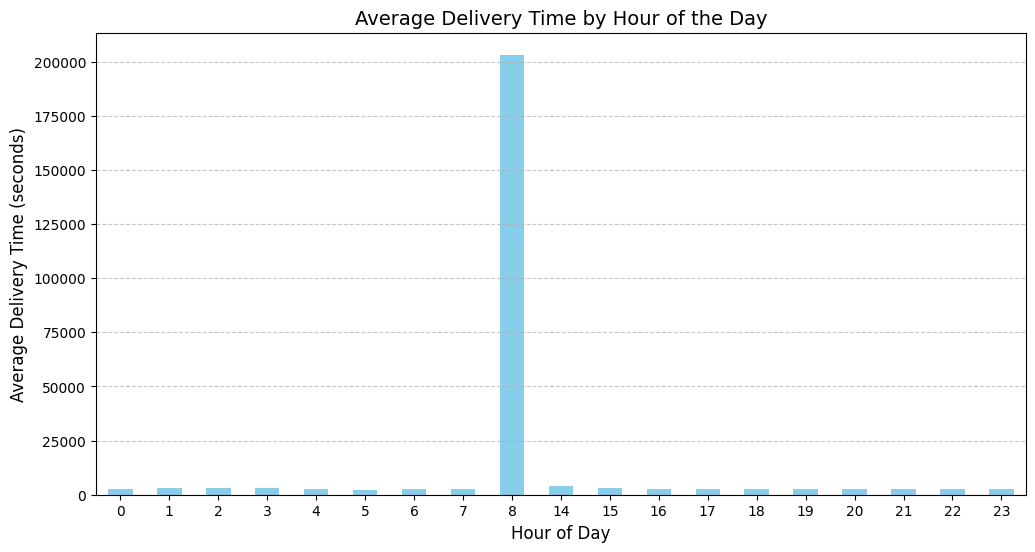

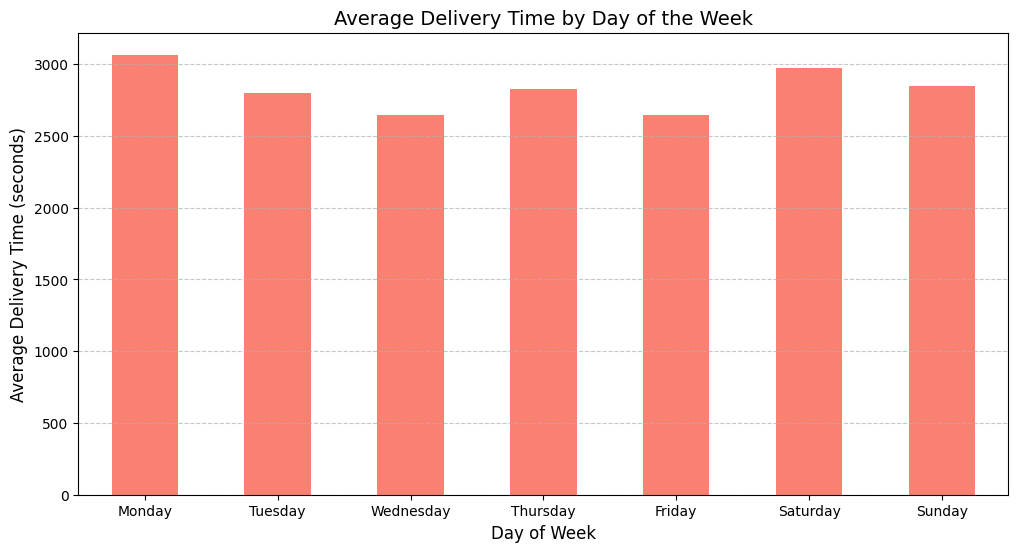

In [108]:
plt.figure(figsize=(12, 6))
EDA.groupby('hour_of_day')['actual_time_in_seconds'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Delivery Time by Hour of the Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Delivery Time (seconds)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot average delivery time by day of the week
plt.figure(figsize=(12, 6))
EDA.groupby('day_of_week')['actual_time_in_seconds'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', color='salmon')
plt.title('Average Delivery Time by Day of the Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Delivery Time (seconds)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

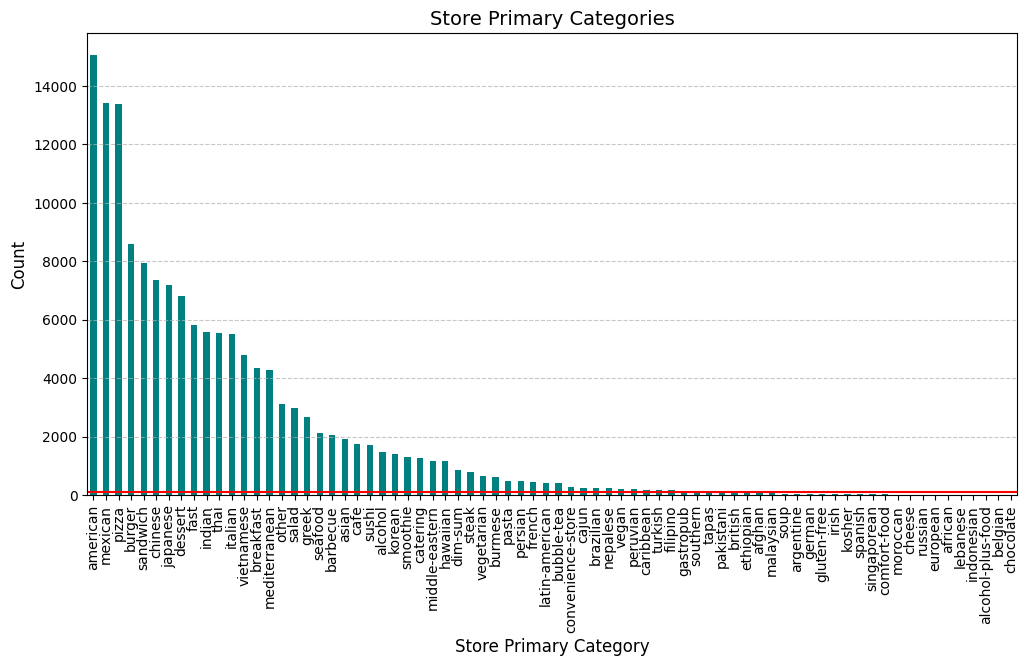

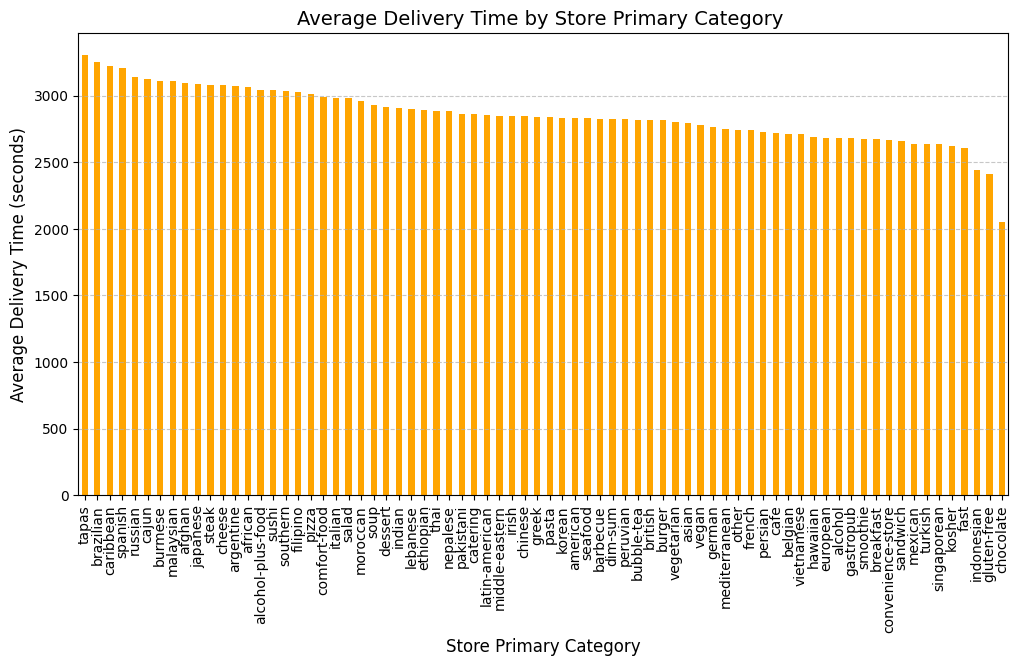

In [109]:
# Categorical feature analysis: Distribution and relationship with delivery time

# Analyze distribution of 'store_primary_category'
plt.figure(figsize=(12, 6))
EDA['store_primary_category'].value_counts().plot(kind='bar', color='teal')
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Store Primary Categories', fontsize=14)
plt.xlabel('Store Primary Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze relationship between 'store_primary_category' and delivery time
plt.figure(figsize=(12, 6))
EDA.groupby('store_primary_category')['actual_time_in_seconds'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Average Delivery Time by Store Primary Category ', fontsize=14)
plt.xlabel('Store Primary Category', fontsize=12)
plt.ylabel('Average Delivery Time (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



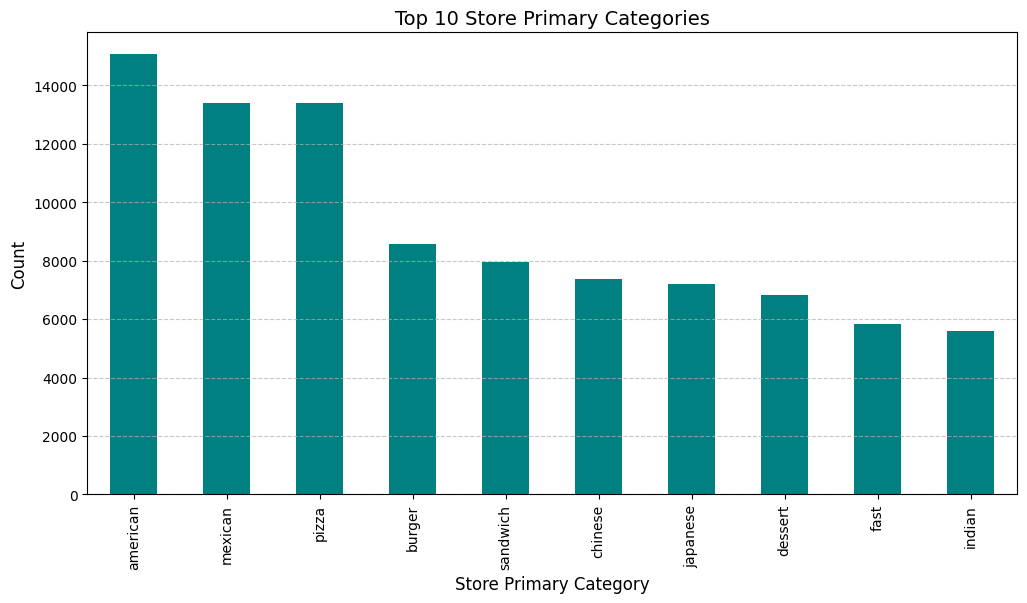

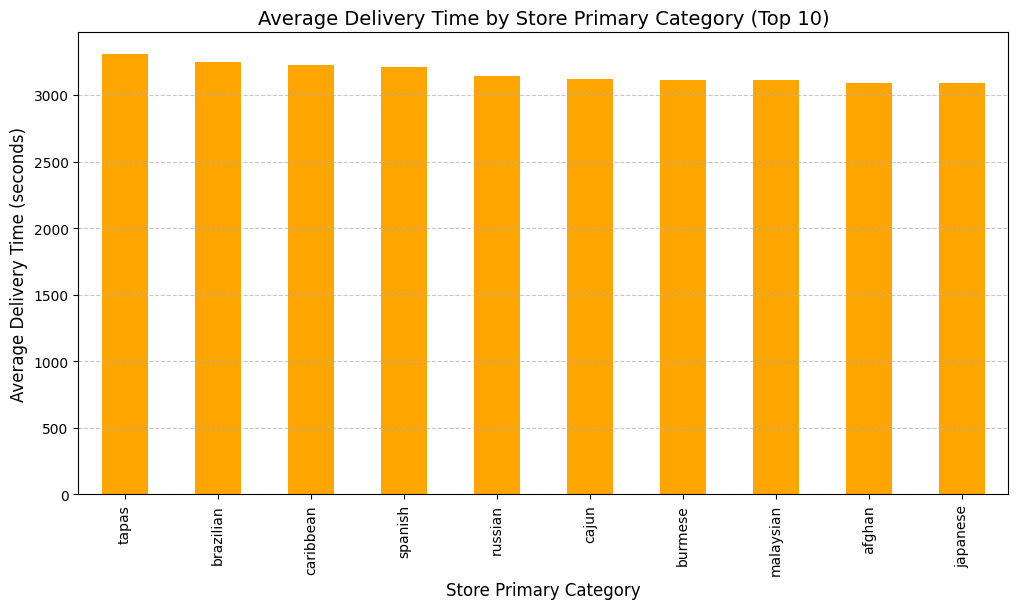

In [110]:
# Categorical feature analysis: Distribution and relationship with delivery time

# Analyze distribution of 'store_primary_category'
plt.figure(figsize=(12, 6))
EDA['store_primary_category'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Store Primary Categories', fontsize=14)
plt.xlabel('Store Primary Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze relationship between 'store_primary_category' and delivery time
plt.figure(figsize=(12, 6))
EDA.groupby('store_primary_category')['actual_time_in_seconds'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Average Delivery Time by Store Primary Category (Top 10)', fontsize=14)
plt.xlabel('Store Primary Category', fontsize=12)
plt.ylabel('Average Delivery Time (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## What we can see from the above analysis is that we can take a threshold of the primary stores that are above 100 and the rest we can eathir remove them or we can group them together. then we do the transofrmation of the categorical features.

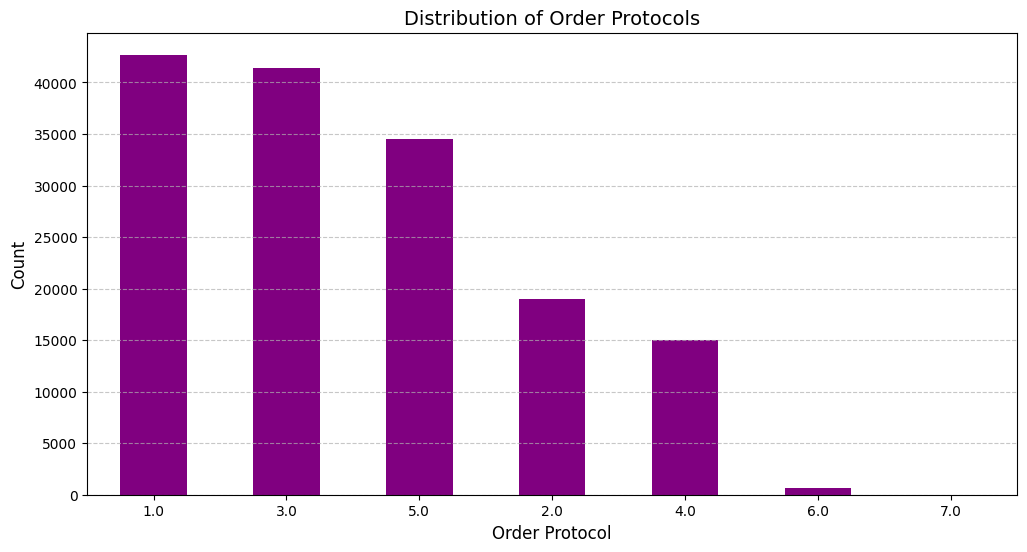

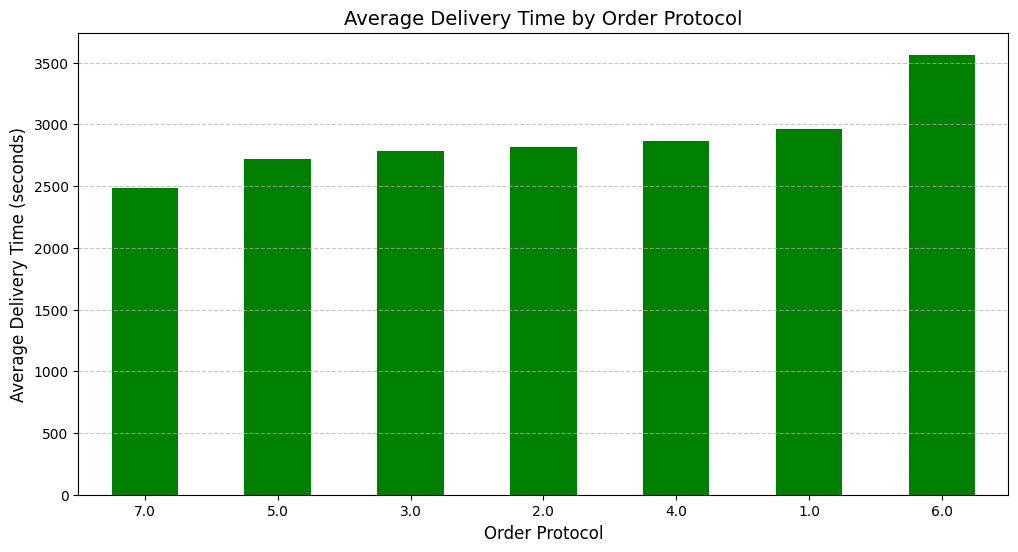

In [111]:
plt.figure(figsize=(12, 6))
EDA['order_protocol'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Order Protocols', fontsize=14)
plt.xlabel('Order Protocol', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze relationship between 'order_protocol' and delivery time
plt.figure(figsize=(12, 6))
EDA.groupby('order_protocol')['actual_time_in_seconds'].mean().sort_values().plot(kind='bar', color='green')
plt.title('Average Delivery Time by Order Protocol', fontsize=14)
plt.xlabel('Order Protocol', fontsize=12)
plt.ylabel('Average Delivery Time (seconds)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Handling missing values 

In [112]:
EDA.isnull().sum()

market_id                                         760
created_at                                          0
actual_delivery_time                                4
store_id                                            0
store_primary_category                           3727
order_protocol                                    772
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_couriers                          12133
total_busy_couriers                             12133
total_outstanding_orders                        12133
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      518
actual_time_in_seconds                              4
hour_of_day                                         0
day_of_week                 

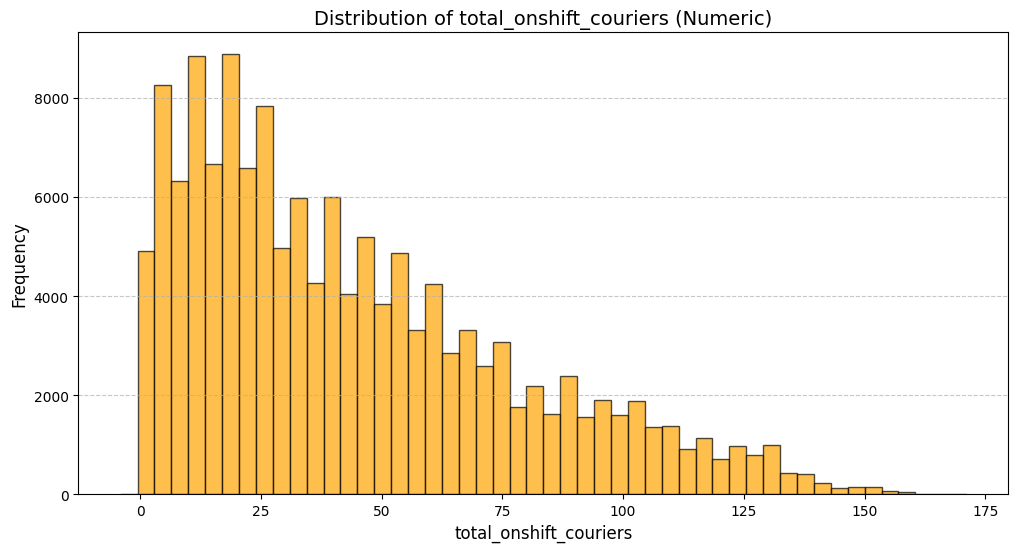

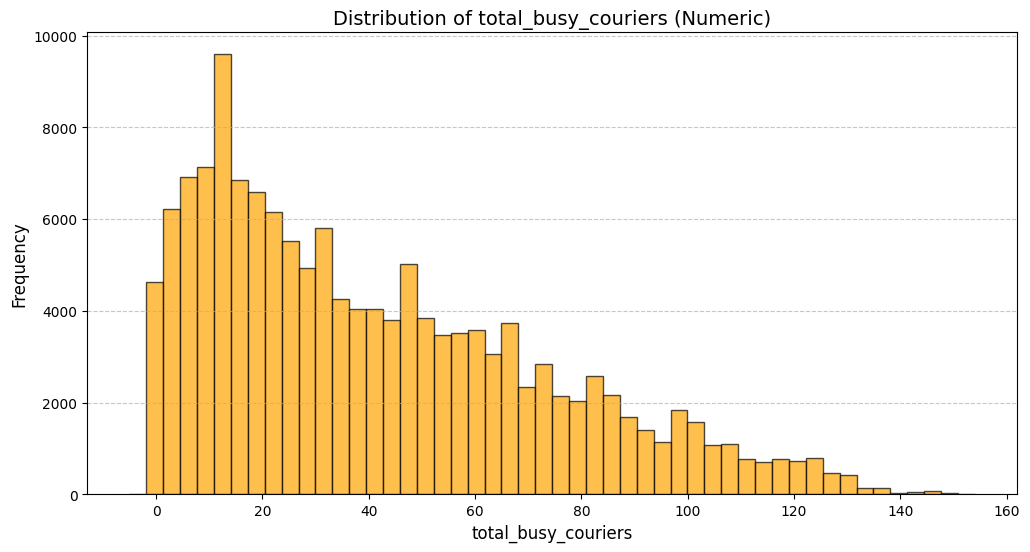

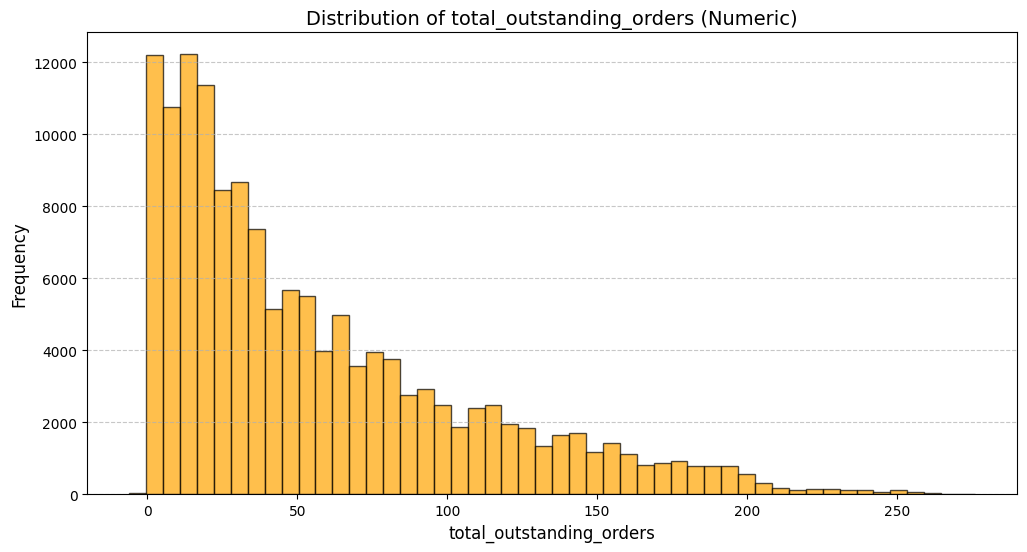

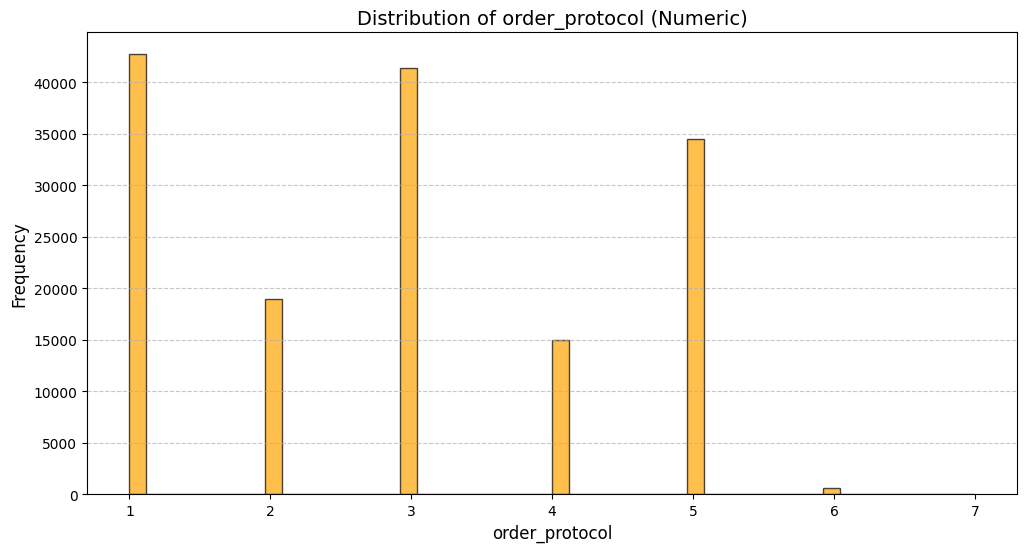

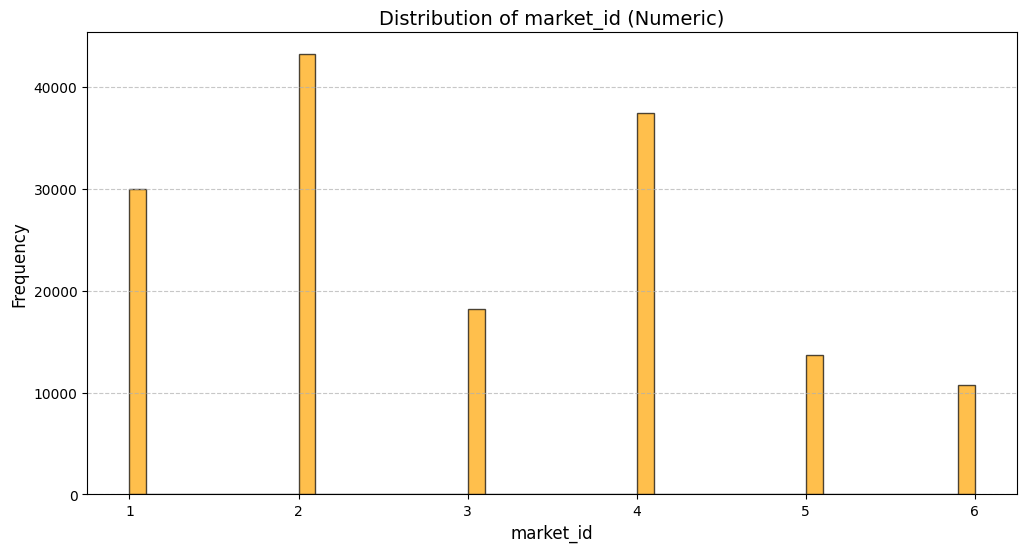

In [113]:
# Plot distributions for columns with missing values before filling
columns_with_missing = ['total_onshift_couriers', 'total_busy_couriers', 'total_outstanding_orders', 
                         'order_protocol', 'market_id']

for col in columns_with_missing:
    plt.figure(figsize=(12, 6))
    
    EDA[col].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7, color='orange')
    plt.title(f'Distribution of {col} (Numeric)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

In [114]:
# Fill missing values for numeric features with the median
numeric_impute_cols = ['total_onshift_couriers', 'total_busy_couriers', 'total_outstanding_orders']
for col in numeric_impute_cols:
    EDA[col].fillna(EDA[col].median(), inplace=True)

# Fill missing values for categorical features with "Unknown"
categorical_impute_cols = ['store_primary_category', 'order_protocol']
for col in categorical_impute_cols:
    EDA[col].fillna('Unknown', inplace=True)

# Drop rows with missing 'actual_delivery_time' (critical for target computation)
EDA.dropna(subset=['actual_delivery_time'], inplace=True)

# Verify if all missing values have been handled
missing_summary_after = EDA.isnull().sum()

# Display the updated missing data summary
missing_summary_after

/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_13133/1182356689.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna('Unknown', inplace=True)


market_id                                       760
created_at                                        0
actual_delivery_time                              0
store_id                                          0
store_primary_category                            0
order_protocol                                    0
total_items                                       0
subtotal                                          0
num_distinct_items                                0
min_item_price                                    0
max_item_price                                    0
total_onshift_couriers                            0
total_busy_couriers                               0
total_outstanding_orders                          0
estimated_order_place_duration                    0
estimated_store_to_consumer_driving_duration    518
actual_time_in_seconds                            0
hour_of_day                                       0
day_of_week                                       0
dtype: int64

In [115]:
# Calculate average delivery time for each store_primary_category
store_category_avg_time = EDA.groupby('store_primary_category')['actual_time_in_seconds'].mean()

# Assign the closest matching store_primary_category for missing rows
def assign_closest_store_category(row):
    if row['store_primary_category'] == '':
        # Find the closest matching category based on actual_time_in_seconds
        closest_category = store_category_avg_time.sub(row['actual_time_in_seconds']).abs().idxmin()
        return closest_category
    return row['store_primary_category']

EDA['store_primary_category'] = EDA.apply(assign_closest_store_category, axis=1)

# Calculate average delivery time for each order_protocol
order_protocol_avg_time = EDA.groupby('order_protocol')['actual_time_in_seconds'].mean()

# Assign the closest matching order_protocol for missing rows
def assign_closest_order_protocol(row):
    if row['order_protocol'] == '':
        # Find the closest matching protocol based on actual_time_in_seconds
        closest_protocol = order_protocol_avg_time.sub(row['actual_time_in_seconds']).abs().idxmin()
        return closest_protocol
    return row['order_protocol']

EDA['order_protocol'] = EDA.apply(assign_closest_order_protocol, axis=1)

# Verify that 'Unknown' values have been replaced
missing_after_imputation = EDA[['store_primary_category', 'order_protocol']].isin(['Unknown']).sum()
missing_after_imputation

store_primary_category    3727
order_protocol             772
dtype: int64

In [116]:
EDA.isnull().sum()

market_id                                       760
created_at                                        0
actual_delivery_time                              0
store_id                                          0
store_primary_category                            0
order_protocol                                    0
total_items                                       0
subtotal                                          0
num_distinct_items                                0
min_item_price                                    0
max_item_price                                    0
total_onshift_couriers                            0
total_busy_couriers                               0
total_outstanding_orders                          0
estimated_order_place_duration                    0
estimated_store_to_consumer_driving_duration    518
actual_time_in_seconds                            0
hour_of_day                                       0
day_of_week                                       0
dtype: int64

In [117]:
EDA.isnull().sum()

market_id                                       760
created_at                                        0
actual_delivery_time                              0
store_id                                          0
store_primary_category                            0
order_protocol                                    0
total_items                                       0
subtotal                                          0
num_distinct_items                                0
min_item_price                                    0
max_item_price                                    0
total_onshift_couriers                            0
total_busy_couriers                               0
total_outstanding_orders                          0
estimated_order_place_duration                    0
estimated_store_to_consumer_driving_duration    518
actual_time_in_seconds                            0
hour_of_day                                       0
day_of_week                                       0
dtype: int64

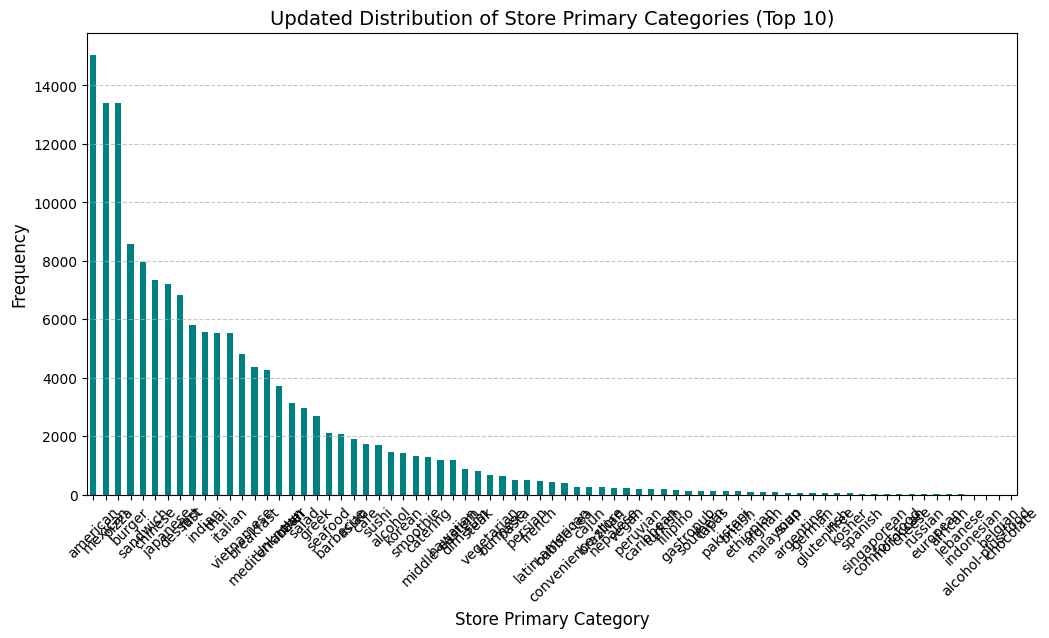

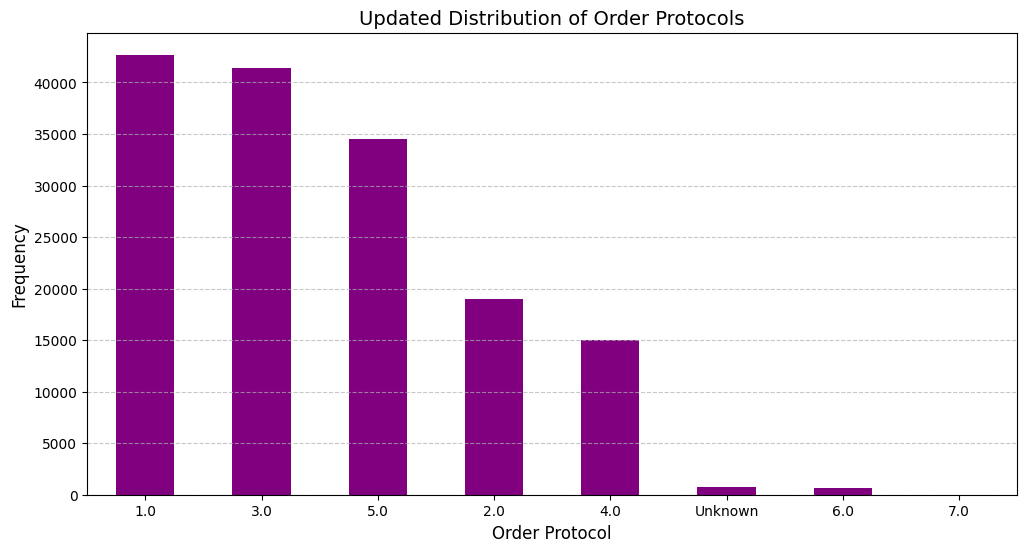

In [118]:
# Replot the distributions for 'store_primary_category' and 'order_protocol' after imputation

# Distribution of 'store_primary_category'
plt.figure(figsize=(12, 6))
EDA['store_primary_category'].value_counts().plot(kind='bar', color='teal')
plt.title('Updated Distribution of Store Primary Categories (Top 10)', fontsize=14)
plt.xlabel('Store Primary Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Distribution of 'order_protocol'
plt.figure(figsize=(12, 6))
EDA['order_protocol'].value_counts().plot(kind='bar', color='purple')
plt.title('Updated Distribution of Order Protocols', fontsize=14)
plt.xlabel('Order Protocol', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Distribution of 'store_primary_category' before imputation
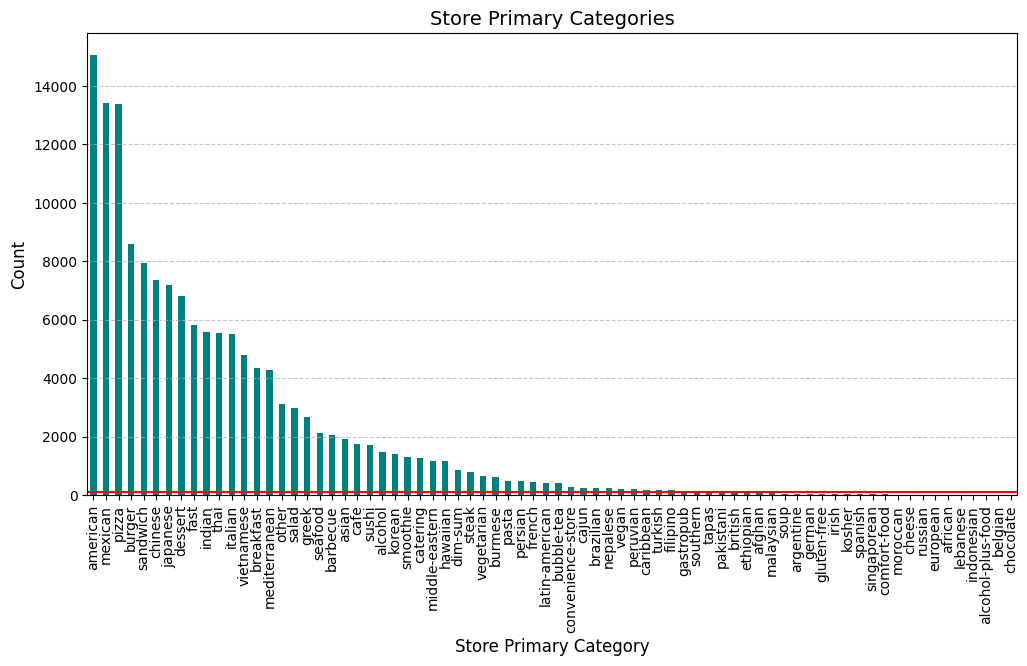

In [119]:
EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153946 entries, 0 to 153949
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype              
---  ------                                        --------------   -----              
 0   market_id                                     153186 non-null  float64            
 1   created_at                                    153946 non-null  datetime64[ns, UTC]
 2   actual_delivery_time                          153946 non-null  datetime64[ns, UTC]
 3   store_id                                      153946 non-null  int64              
 4   store_primary_category                        153946 non-null  object             
 5   order_protocol                                153946 non-null  object             
 6   total_items                                   153946 non-null  int64              
 7   subtotal                                      153946 non-null  int64              
 8   num_disti

In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153946 entries, 0 to 153949
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     153186 non-null  float64
 1   store_id                                      153946 non-null  int64  
 2   store_primary_category                        153946 non-null  object 
 3   order_protocol                                153946 non-null  object 
 4   total_items                                   153946 non-null  int64  
 5   subtotal                                      153946 non-null  int64  
 6   num_distinct_items                            153946 non-null  int64  
 7   min_item_price                                153946 non-null  int64  
 8   max_item_price                                153946 non-null  int64  
 9   total_onshift_couriers                        153946 

In [121]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Splitting data into features and target variable
X = EDA.drop(columns=['actual_time_in_seconds', 'created_at', 'actual_delivery_time', 'day_of_week', 'hour_of_day'])
y = EDA['actual_time_in_seconds']


In [122]:
EDA.info()


<class 'pandas.core.frame.DataFrame'>
Index: 153946 entries, 0 to 153949
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype              
---  ------                                        --------------   -----              
 0   market_id                                     153186 non-null  float64            
 1   created_at                                    153946 non-null  datetime64[ns, UTC]
 2   actual_delivery_time                          153946 non-null  datetime64[ns, UTC]
 3   store_id                                      153946 non-null  int64              
 4   store_primary_category                        153946 non-null  object             
 5   order_protocol                                153946 non-null  object             
 6   total_items                                   153946 non-null  int64              
 7   subtotal                                      153946 non-null  int64              
 8   num_disti

In [123]:
EDA.isna().sum()

market_id                                       760
created_at                                        0
actual_delivery_time                              0
store_id                                          0
store_primary_category                            0
order_protocol                                    0
total_items                                       0
subtotal                                          0
num_distinct_items                                0
min_item_price                                    0
max_item_price                                    0
total_onshift_couriers                            0
total_busy_couriers                               0
total_outstanding_orders                          0
estimated_order_place_duration                    0
estimated_store_to_consumer_driving_duration    518
actual_time_in_seconds                            0
hour_of_day                                       0
day_of_week                                       0
dtype: int64

In [124]:
EDA.dropna(inplace=True)
EDA.isna().sum()


market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_couriers                          0
total_busy_couriers                             0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
actual_time_in_seconds                          0
hour_of_day                                     0
day_of_week                                     0
dtype: int64

In [125]:

# Splitting into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the ColumnTransformer for One-Hot Encoding only on the training and testing data
categorical_columns = ['store_primary_category', 'order_protocol']
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse=False), categorical_columns)
    ],
    remainder='passthrough'  # Keep all other columns unchanged
)



In [126]:
X_train.isna().sum()

market_id                                       605
store_id                                          0
store_primary_category                            0
order_protocol                                    0
total_items                                       0
subtotal                                          0
num_distinct_items                                0
min_item_price                                    0
max_item_price                                    0
total_onshift_couriers                            0
total_busy_couriers                               0
total_outstanding_orders                          0
estimated_order_place_duration                    0
estimated_store_to_consumer_driving_duration    421
dtype: int64

In [129]:
# Ensure categorical columns have consistent data types
X['store_primary_category'] = X['store_primary_category'].fillna('Unknown').astype(str)
X['order_protocol'] = X['order_protocol'].fillna('Unknown').astype(str)

# Re-split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reapply the column transformer with fixed data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Create DataFrames for the transformed training and testing sets
transformed_columns = column_transformer.named_transformers_['onehot'].get_feature_names_out(categorical_columns)
X_train_EDA = pd.DataFrame(
    X_train_transformed,
    columns=list(transformed_columns) + list(X_train.drop(columns=categorical_columns).columns)
)
X_test_EDA = pd.DataFrame(
    X_test_transformed,
    columns=list(transformed_columns) + list(X_test.drop(columns=categorical_columns).columns)
)

# Display the shape of the transformed data
X_train_EDA.shape, X_test_EDA.shape, y_train.shape, y_test.shape

/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


((123156, 92), (30790, 92), (123156,), (30790,))

In [133]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Define the imputer for numeric columns
numeric_imputer = SimpleImputer(strategy='median')

# Define the OneHotEncoder for categorical columns with handle_unknown='ignore'
categorical_encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# Define the ColumnTransformer to apply the imputer and encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', categorical_encoder, ['store_primary_category', 'order_protocol'])
    ],
    remainder='passthrough'  # Keep all other columns unchanged
)

# Create a pipeline that applies the preprocessor and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Report the MSE
print(mse)

/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1097613.1646551536


/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [136]:
np.sqrt(mse)/60


17.461172518978863

In [137]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np

# Define the imputer for numeric columns
numeric_imputer = SimpleImputer(strategy='median')

# Define the OneHotEncoder for categorical columns with handle_unknown='ignore'
categorical_encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# Define the ColumnTransformer to apply the imputer and encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', categorical_encoder, ['store_primary_category', 'order_protocol'])
    ],
    remainder='passthrough'  # Keep all other columns unchanged
)

# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Support Vector Regressor', SVR())
]

# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models:
        # Create a pipeline for each model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        # Fit the pipeline on the training data
        pipeline.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = pipeline.predict(X_test)
        
        # Calculate the RMSE
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        # Store the results
        results[name] = rmse
        print(f"{name} RMSE: {rmse}")
    
    return results

# Evaluate the models
results = evaluate_models(models, X_train, X_test, y_train, y_test)
results

/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Linear Regression RMSE: 1047.6703511387318


/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Decision Tree RMSE: 1436.0109153492538


/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Random Forest RMSE: 1037.38757474889


/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Gradient Boosting RMSE: 1058.1594630764678


/Users/majed-abdulkareem/opt/anaconda3/envs/majed/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Support Vector Regressor RMSE: 1154.7491732274425


{'Linear Regression': 1047.6703511387318,
 'Decision Tree': 1436.0109153492538,
 'Random Forest': 1037.38757474889,
 'Gradient Boosting': 1058.1594630764678,
 'Support Vector Regressor': 1154.7491732274425}

In [142]:
for i in results.values():
    print(i/60)

17.461172518978863
23.933515255820897
17.289792912481502
17.635991051274463
19.245819553790707
